<a href="https://colab.research.google.com/github/nguyenvanduchust/2003-diser-figure/blob/main/QPSK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Pycryptodomex
!pip install Pycryptodome

In [ ]:
import base64
import hashlib
import binascii
from Cryptodome.Cipher import AES
from Cryptodome.Random import get_random_bytes

In [ ]:
#Key is changed able
__key__ = hashlib.sha256(b'16-character key').digest()

In [ ]:
def encrypt(raw):
    BS = AES.block_size
    pad = lambda s: s + (BS - len(s) % BS) * chr(BS - len(s) % BS)

    raw = base64.b64encode(pad(raw).encode('utf8'))
    iv = get_random_bytes(AES.block_size)
    cipher = AES.new(key= __key__, mode= AES.MODE_CFB,iv= iv)
    return base64.b64encode(iv + cipher.encrypt(raw))
def decrypt(enc):
    unpad = lambda s: s[:-ord(s[-1:])]

    enc = base64.b64decode(enc)
    iv = enc[:AES.block_size]
    cipher = AES.new(__key__, AES.MODE_CFB, iv)
    return unpad(base64.b64decode(cipher.decrypt(enc[AES.block_size:])).decode('utf8'))
def listtostring(s):
    str1=""
    for ele in s:
      str1+=str(ele)
    return str1
def stringtolist(string):
    list1=[int(x) for x in string]
    return list1
def bytetobit(s):
    return ''.join(format(byte, '08b') for byte in s)
def bittobyte(s):
    return int(s, 2).to_bytes((len(s) + 7) // 8, byteorder='big')

In [ ]:
input="Vu Trong Tung"
print("Input is: ",input)
print("AES key is: ",__key__)
cipertext = encrypt(input)
print("Ciper text: ", cipertext)
bitciper = bytetobit(cipertext)
print("Bit ciper: ", bitciper)


Input is:  Vu Trong Tung
AES key is:  b'\x130%\xcd\x85}\xeb\xb7~7\xe6z\xb8\x18i?\xbb\xf6F\xf2\xd4\xb4\xc1\tx\x8f\xa6\xe3\xa4\x82\x1e\x15'
Ciper text:  b'X5BDsMso1YFvJElZbmDVO5ElWZNmV48ilwJg3lxx4fk28TABP/THrA=='
Bit ciper:  0101100000110101010000100100010001110011010011010111001101101111001100010101100101000110011101100100101001000101011011000101101001100010011011010100010001010110010011110011010101000101011011000101011101011010010011100110110101010110001101000011100001101001011011000111011101001010011001110011001101101100011110000111100000110100011001100110101100110010001110000101010001000001010000100101000000101111010101000100100001110010010000010011110100111101


In [ ]:
#print(len(__key__))
#print(len(bytetobit(__key__)))
iv=get_random_bytes(AES.block_size)
print(iv)
print(len(iv))
print(len(bytetobit(iv)))

b'/.A\x97\xd4\xfc\x86\x89\xc9\x84\x01\xb2\x1d\xee\x03\xdf'
16
128


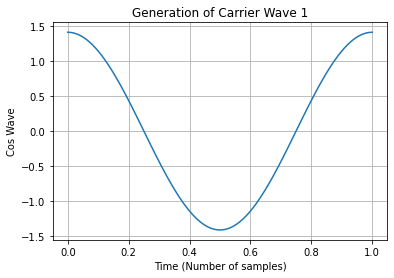

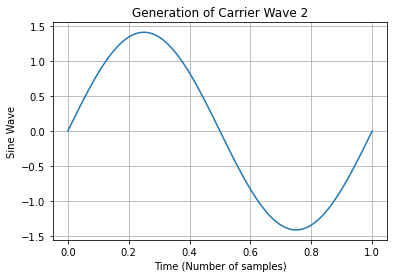

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import random

t = np.linspace(0,1,100)  # Time
ts = 1;  # thoi gian ton tai cua 1 ki hieu- 2 bit
fc = 1;    # carrier frequency

c1 = sqrt(2/ts)*np.cos(2*np.pi*fc*t)  # carrier frequency cosine wave
c2 = sqrt(2/ts)*np.sin(2*np.pi*fc*t)  # carrier frequency sine wave

fig, ax1 = plt.subplots()

ax1.plot(t, c1)
ax1.grid()
ax1.set_xlabel('Time (Number of samples)')
ax1.set_ylabel('Cos Wave')
plt.title('Generation of Carrier Wave 1')
plt.show()

fig, ax2 = plt.subplots()
ax2.plot(t, c2)
ax2.grid()
ax2.set_xlabel('Time (Number of samples)')
ax2.set_ylabel('Sine Wave')
plt.title('Generation of Carrier Wave 2')
plt.show()


Chuẩn bị phát đi bản tin 448 bit

In [ ]:
m = stringtolist(bitciper) #message signal(binary)


In [ ]:
print(m)

[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 

*Độ* dài bản tin = 448 với input"Hello World"

In [ ]:
data_length = len(m)

In [ ]:
m[0]


0

#Modulation

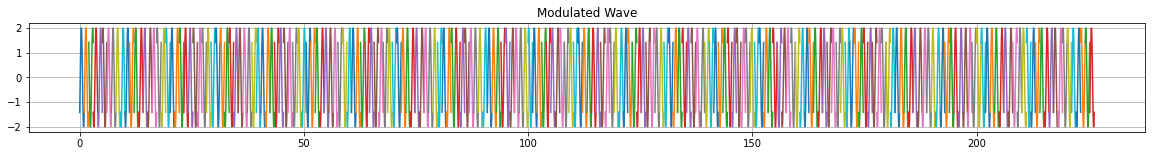

In [ ]:

odd_sig = np.zeros((data_length,100))
even_sig = np.zeros((data_length,100))
fig, ax4 = plt.subplots(figsize=(20,2))
#first32bits = list(range(0,31,2))
t1 = 0;
t2 = ts;
for i in range(0,data_length-1,2):
    t = np.linspace(t1,t2,100)
    if (m[i]>0.5):
        m[i] = 1
        m_s = np.ones((1,len(t))) #digital to NRZ
    else:
        m[i] = 0
        m_s = (-1)*np.ones((1,len(t)))  #digital to NRZ
    odd_sig[i,:] = c1*m_s #tao kenh I
    if (m[i+1]>0.5):
        m[i+1] = 1
        m_s = np.ones((1,len(t)))  #digital to NRZ
    else:
        m[i+1] = 0
        m_s = (-1)*np.ones((1,len(t)))  #digital to NRZ

    even_sig[i,:] = c2*m_s #tao kenh Q

    qpsk = odd_sig + even_sig   # modulated wave = oddbits + evenbits = I(t) + Q(t)

    #if(i in first32bits):
    ax4.plot(t,qpsk[i,:])

    t1 = t1 + (ts+0.01)
    t2 = t2 + (ts+0.01)
#plt.xticks(np.linspace(0,data_length//2,data_length32//2+1)) //bỏ qua
ax4.grid()
plt.title('Modulated Wave')
plt.show()

**Message signal (Binary)**

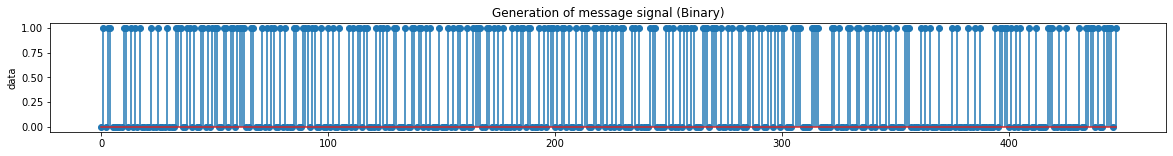

In [ ]:
fig, ax3 = plt.subplots(figsize=(20,2))
x = np.linspace(0,data_length-1,data_length)
ax3.stem(range(data_length), m,use_line_collection=True)
#ax3.step(x, m,where='post', label='post')
ax3.set_ylabel('data')
#plt.ylim((-1,1))
#plt.xticks(x)
plt.title('Generation of message signal (Binary)')
plt.show()

**Add white noise**


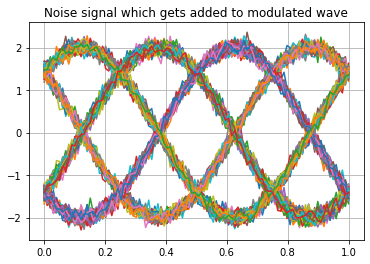

In [ ]:
noise = np.random.normal(0, 0.1, [data_length,100]) # noise using random function

channel = noise + qpsk    # them nhieu vao dieu che qpsk
t = np.linspace(0,1,100)
fig, ax5 = plt.subplots()
for i in range(0,data_length,2):
       ax5.plot(t,channel[i,:])

ax5.grid()
plt.title('Noise signal which gets added to modulated wave')
plt.show()


#Demodulation

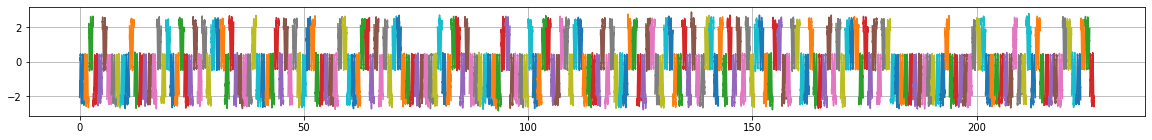

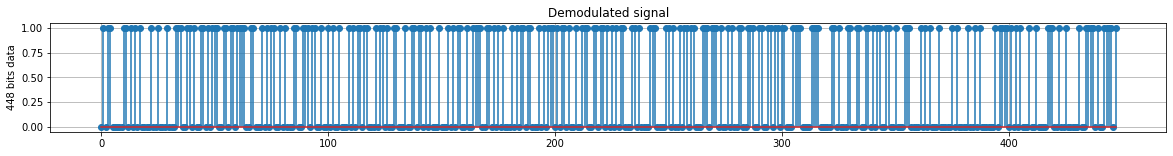

In [ ]:
t1 = 0
t2 = ts
#first32bits = list(range(0,31,2))
demod = np.zeros((data_length,1))    # demodulated signal  (demodulation of noise + qpsk modulated wave)
fig, ax7 = plt.subplots(figsize=(20,2))
for i in range(0,data_length-1,2):
    t = np.linspace(t1,t2,100)
    x1 = sum(c1*channel[i,:]) #tính tích phân
    x2 = sum(c2*channel[i,:])   #tính tích phân

    if(x1>0 and x2>0):
        demod[i] = 1
        demod[i+1] = 1
    elif (x1>0 and x2<0):
        demod[i] = 1
        demod[i+1] = 0
    elif (x1<0 and x2<0):
        demod[i] = 0
        demod[i+1] = 0
    elif (x1<0 and x2>0):
        demod[i] = 0
        demod[i+1] = 1
    #if(i in first32bits):
    ax7.plot(t,c1*channel[i,:])  # vẽ 1 kênh I trước khi tính tích phân
    t1 = t1 + (ts+0.01)
    t2 = t2 + (ts+0.01)


fig, ax6 = plt.subplots(figsize=(20,2))
ax6.stem(range(data_length), demod,use_line_collection=True)
#ax6.step(x, m,where='post', label='post')
ax6.grid()
ax7.grid()
ax6.set_ylabel('448 bits data')
plt.title('Demodulated signal')
plt.show()

In [ ]:
dem = [int(x) for x in np.squeeze(demod).tolist()]


In [ ]:
print(dem)

[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 

In [ ]:
print(m)

[0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 

tỉ lệ bit lỗi/bit truyền

In [ ]:
difference = [a_i + b_i for a_i, b_i in zip(m, dem)]
count = 0
for d in difference:
  if d > 0.5 and d < 1.5:
    count +=1
BER=count/data_length
BER

0.0

Số bit truyền lỗi

In [ ]:
print(count)

0


#Decryption

In [ ]:
byteciper = bittobyte(listtostring(dem))
print("Byte ciper: ", byteciper)
decryptext = decrypt(byteciper)
print("Decrypt: ", decryptext)

Byte ciper:  b'X5BDsMso1YFvJElZbmDVO5ElWZNmV48ilwJg3lxx4fk28TABP/THrA=='
Decrypt:  Vu Trong Tung
